Anthony Adungo Machine Learning Project.

# Project Description

This project focuses on predicting medical insurance premiums using a publicly available dataset. The dataset includes key attributes such as demographics, health-related factors, and personal habits, which influence the cost of insurance premiums. The primary objective is to develop machine-learning models capable of accurately forecasting premium amounts. This involves identifying the most significant factors affecting premiums and providing actionable insights to refine pricing strategies, enabling insurers to optimize their offerings and enhance customer satisfaction.

# Key Objectives

Data Exploration and Preprocessing.

Perform exploratory data analysis (EDA) to understand the dataset’s structure.
Clean the data by handling missing values, addressing outliers, and encoding categorical variables where necessary.

Feature Engineering.

Develop and refine features to enhance model performance by identifying relationships between demographic, behavioral, and other relevant factors.

Model Development

Utilize machine learning algorithms, including Multiple Linear Regression, Random Forest Regressor, and XGBoost Regressor, to predict medical insurance premiums.
Compare the performance of these models to determine the best approach for accurate predictions.

Model Evaluation

Evaluate each model’s performance using metrics such as R², Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).
Ensure the models are robust and capable of generalizing well to unseen data.

Insights and Recommendations

Analyze model outputs to identify the most influential factors affecting insurance premiums.
Provide actionable insights for insurers to optimize premium pricing strategies and enhance customer satisfaction.

# Tools and Technologies

Programming: Python (Pandas, NumPy, Scikit-learn, XGBoost)
Environment: Jupyter Notebooks
Visualization: Matplotlib, Seaborn
Machine Learning: Multiple Linear Regression, Random Forest Regressor, XGBoost Regressor

# Part 1: Data Pre-processing

I) Importing the dataset and exploring its properties.

In [95]:
#Importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [96]:
df = pd.read_csv('insurance.csv')
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1245,28,male,24.300,5,no,southwest,5615.36900
908,63,male,39.800,3,no,southwest,15170.06900
319,32,male,37.335,1,no,northeast,4667.60765
462,62,female,38.095,2,no,northeast,15230.32405
729,41,female,36.080,1,no,southeast,6781.35420


In [97]:
df.shape

(1338, 7)

In [98]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [100]:
#Finding the statistical summary of the dataset.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [101]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [102]:
#Finding the categorical variables.
df.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [103]:
len(df.select_dtypes(include='object').columns)

3

In [104]:
df.select_dtypes(include=['float64','int64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [105]:
len(df.select_dtypes(include=['float64','int64']).columns)

4

II) Dealing with missing values.

In [106]:
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

     age    sex    bmi  children  smoker  region  charges
0  False  False  False     False   False   False    False
1  False  False  False     False   False   False    False
2  False  False  False     False   False   False    False
3  False  False  False     False   False   False    False
4  False  False  False     False   False   False    False
age
age
False    1338
Name: count, dtype: int64
 
sex
sex
False    1338
Name: count, dtype: int64
 
bmi
bmi
False    1338
Name: count, dtype: int64
 
children
children
False    1338
Name: count, dtype: int64
 
smoker
smoker
False    1338
Name: count, dtype: int64
 
region
region
False    1338
Name: count, dtype: int64
 
charges
charges
False    1338
Name: count, dtype: int64
 


III) Creating bins to see the distribution of the charges.

Text(0, 0.5, 'Count')

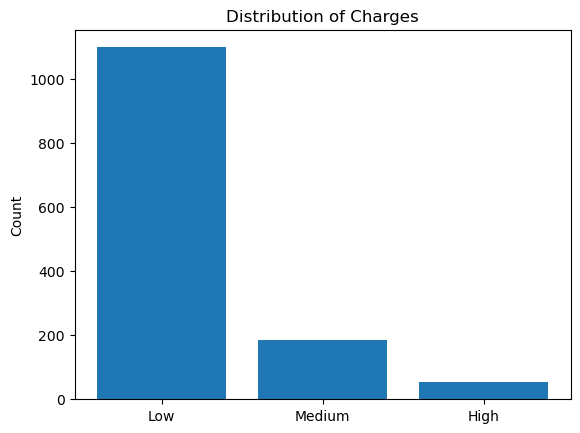

In [107]:
bins = np.linspace(min(df['charges']), max(df['charges']),4)
group_names = ["Low","Medium","High"]
df["charges_binned"] = pd.cut(df["charges"], bins, labels = group_names, include_lowest= True)
plt.bar(group_names,df["charges_binned"].value_counts())
plt.title("Distribution of Charges")
plt.ylabel("Count")

IV) Grouping the dataset by 'sex','smoker' and 'region'.

In [108]:
df.groupby('sex').mean(numeric_only=True)

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [109]:
df.groupby('smoker').mean(numeric_only=True)

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [110]:
''' There is a huge disparity between charges for smokers and non-smokers. Smokers on average pay 4 times as much as non-smokers.'''

' There is a huge disparity between charges for smokers and non-smokers. Smokers on average pay 4 times as much as non-smokers.'

In [111]:
df.groupby('region').mean(numeric_only=True)

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [112]:
pearson_coef, p_value = stats.pearsonr(df['bmi'],df["charges"])
print(pearson_coef, p_value)

0.19834096883362912 2.459085535116604e-13


In [113]:
'''There is a statistically significant relationship between the bmi and charges.'''

'There is a statistically significant relationship between the bmi and charges.'

V) Feature Engineering.

In [114]:
for column in df.select_dtypes(include='object').columns.tolist():
    print(df[column].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [115]:
df = df.drop(columns = "charges_binned")

In [116]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [117]:
dataset = pd.get_dummies(data = df,drop_first=True)

In [118]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [119]:
dataset.shape

(1338, 9)

V) Correlation matrix.

In [120]:
dataset_2 = dataset.drop(columns = 'charges')

<Axes: title={'center': 'Correlation with Charges'}>

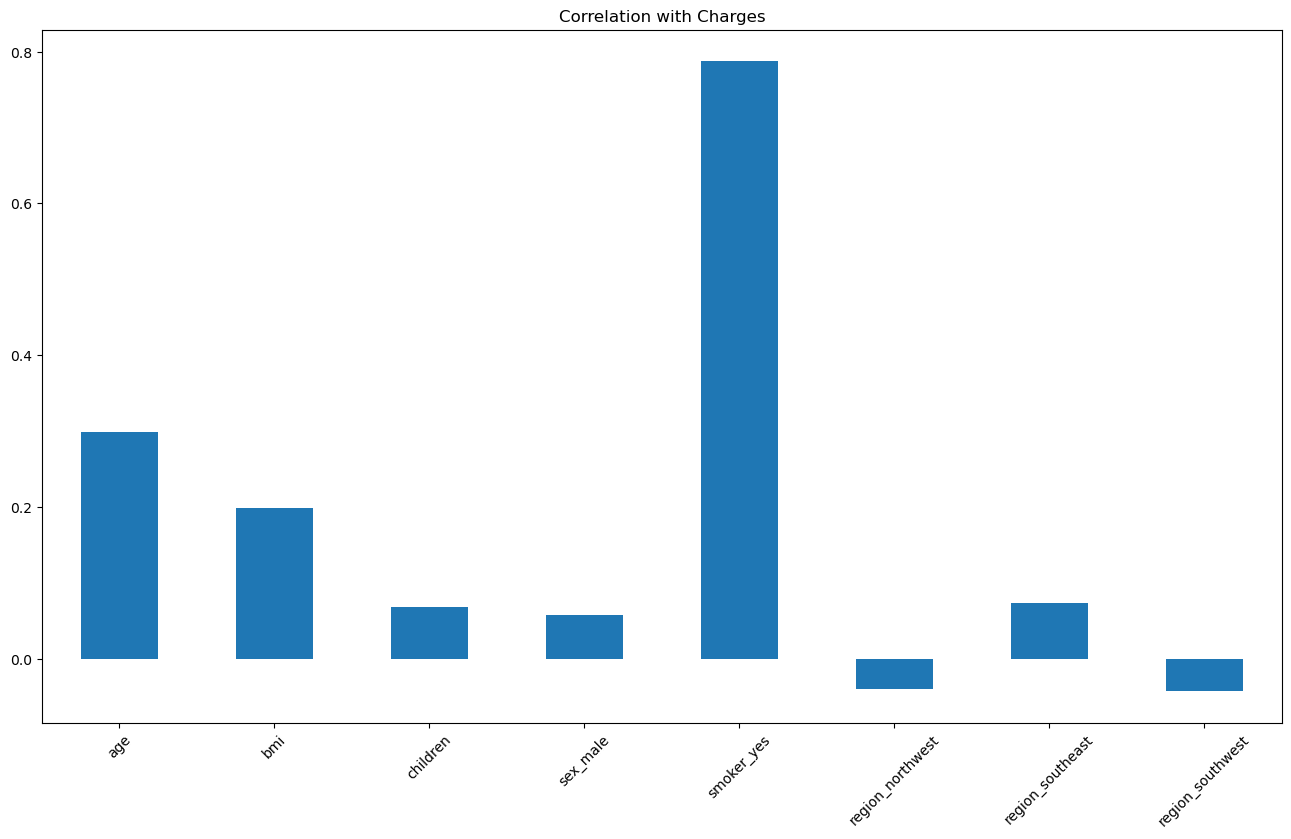

In [121]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize = (16,9),
    title = "Correlation with Charges",
rot=45)

In [122]:
corr = dataset.corr()

<Axes: >

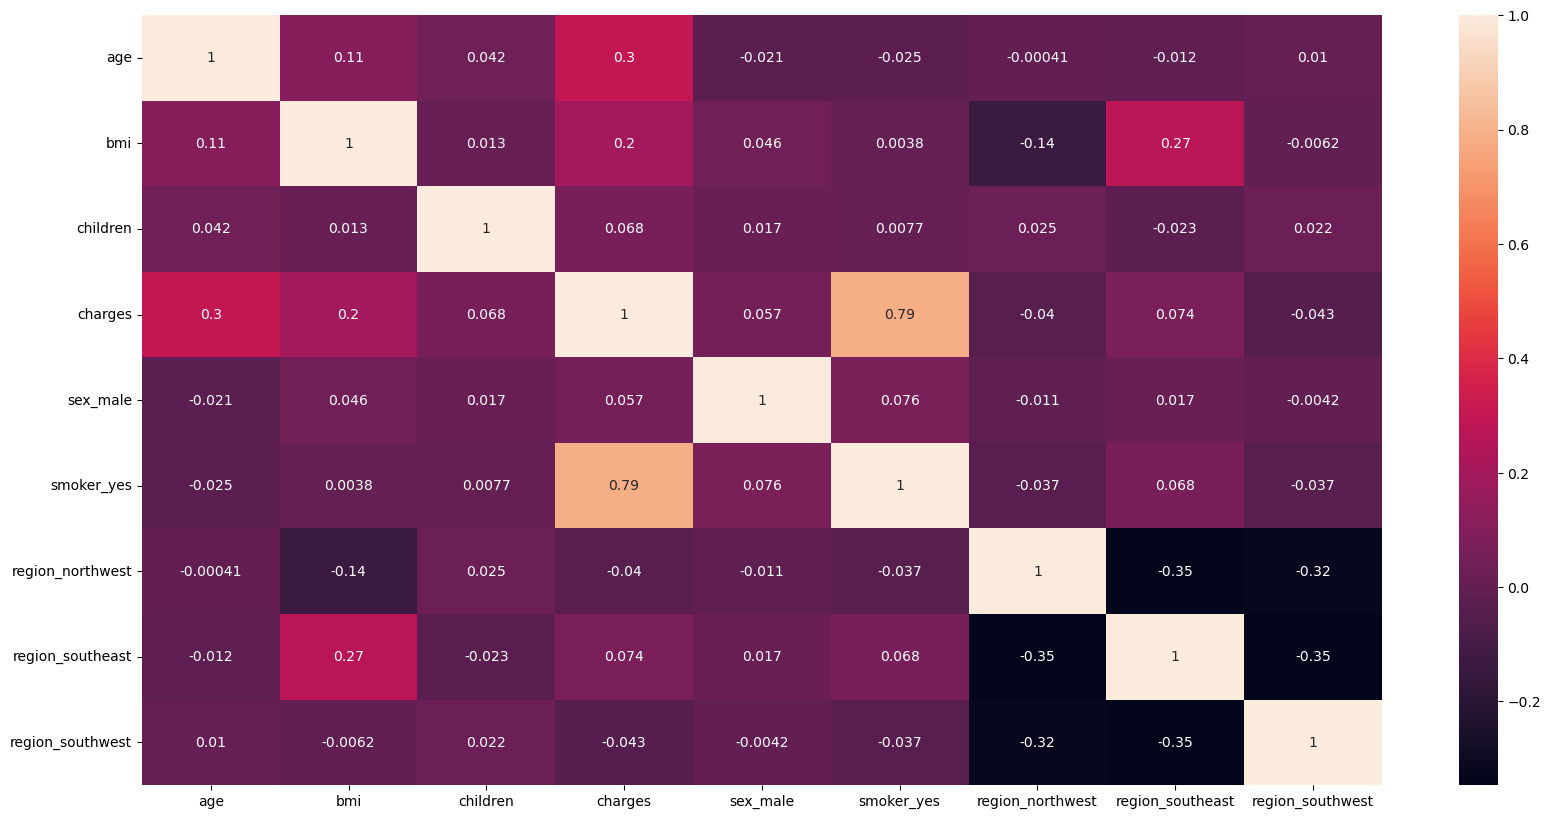

In [123]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True)

VI) Splitting the dataset.

In [124]:
#Independent variable.
X = dataset.drop(columns= 'charges')

In [125]:
X.shape

(1338, 8)

In [126]:
#Dependent variable.
y = dataset['charges']

In [127]:
y.shape

(1338,)

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [130]:
X_train.shape

(1070, 8)

In [131]:
X_test.shape

(268, 8)

VI) Feature Scaling.

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()

In [134]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
X_train

array([[-1.15786012, -0.68882801, -0.92785237, ..., -0.56943606,
         1.64390454, -0.57087511],
       [-1.51663179,  1.24518419, -0.92785237, ..., -0.56943606,
         1.64390454, -0.57087511],
       [ 0.77950689,  2.31160214, -0.09635988, ..., -0.56943606,
         1.64390454, -0.57087511],
       ...,
       [ 1.28178723,  0.5435502 , -0.92785237, ...,  1.75612342,
        -0.60830783, -0.57087511],
       [ 0.92301556,  1.12112479,  0.73513261, ...,  1.75612342,
        -0.60830783, -0.57087511],
       [-0.22505378, -1.78235828, -0.92785237, ..., -0.56943606,
        -0.60830783, -0.57087511]])

In [136]:
X_test

array([[-0.08154511,  1.04307417, -0.09635988, ..., -0.56943606,
        -0.60830783, -0.57087511],
       [-1.37312312, -0.31500662, -0.92785237, ..., -0.56943606,
        -0.60830783, -0.57087511],
       [ 1.06652423, -0.86136096, -0.09635988, ..., -0.56943606,
        -0.60830783, -0.57087511],
       ...,
       [-1.15786012, -2.1882215 , -0.09635988, ...,  1.75612342,
        -0.60830783, -0.57087511],
       [ 1.35354156,  0.39402164, -0.92785237, ..., -0.56943606,
        -0.60830783,  1.75169662],
       [ 1.28178723, -0.03402439, -0.92785237, ...,  1.75612342,
        -0.60830783, -0.57087511]])

# Part 2: Building the models.

I) Multiple Linear Regression.

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [139]:
y_pred = model_lr.predict(X_test)

In [140]:
from sklearn.metrics import r2_score

In [141]:
score = r2_score(y_test, y_pred)

In [142]:
score

0.760837110132396

II) Random Forest Regressor.

In [143]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(random_state=0)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [144]:
y_pred = regressor_rf.predict(X_test)

In [145]:
score = r2_score(y_test, y_pred)

In [146]:
score

0.8409756227354694

III) XB Boost Regressor

In [147]:
from xgboost import XGBRegressor

In [148]:
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [149]:
y_pred = regressor_xgb.predict(X_test)

In [150]:
score = r2_score(y_test, y_pred)

In [151]:
score

0.8274000763370111

# Part 3: Predict charges for a new customer.

In [152]:
new_customer1_obsv = [[40, 45.5, 4, 1, 1, 0, 0, 0]]

In [153]:
regressor_xgb.predict(scaler.transform(new_customer1_obsv))

array([44938.145], dtype=float32)

In [154]:
new_customer_2 = [[22, 23.5, 4, 1, 1, 0, 0, 0]]

In [155]:
regressor_xgb.predict(scaler.transform(new_customer_2))

array([16239.731], dtype=float32)